In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 

In [3]:
data=pd.read_csv('FullData.csv')
data.head()

,Unnamed: 0,Sl.No.,State/UT,Literacy %,Unemployment,Sex Ratio,Greed,Loath,Love,Year,Region,Urbanization,NSDP per capita,Population Density,Homeless prop,Alcohol %,Below poverty line,Total Murders
0,0,1,Andhra Pradesh,70.0,4.7,1001.786755,120.475113,50.339367,87.104072,2016.0,S,0.326723,1.826199,0.316234,1.188334,46.405980,46.603568,257.918552
1,1,2,Assam,79.0,6.9,1040.271327,1796.774194,996.774194,225.806452,2016.0,NE,0.147812,1.604666,0.425648,0.386947,48.420071,99.861653,3019.354839
2,2,3,Bihar,68.5,7.2,1086.736819,1008.771930,335.839599,244.360902,2016.0,E,0.117615,0.220935,1.223570,0.395643,40.752563,351.235180,1588.972431
3,3,4,Chattisgarh,75.0,2.9,1006.931408,55.710306,63.602600,61.745590,2016.0,C,0.250648,2.415419,0.205605,0.871133,36.147755,102.165770,181.058496
4,4,5,Gujarat,79.0,3.3,1096.833908,167.907361,209.263854,167.080232,2016.0,W,0.455098,1.974763,0.335153,2.196505,20.798578,100.837700,544.251447


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

## Modelling

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
df_encoded = pd.get_dummies(data, columns=['Region'])

In [7]:
features = df_encoded.drop(['Sl.No.','State/UT','Greed','Loath','Love','Total Murders'],axis=1).columns

In [8]:
X = df_encoded[features]
y = df_encoded['Total Murders']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                              MAE           MSE         RMSE        R2
Linear Regression      427.092630  4.800344e+05   692.845146  0.505756
Ridge Regression       425.695299  4.818613e+05   694.162334  0.503875
Lasso Regression       427.397314  4.835330e+05   695.365351  0.502154
ElasticNet Regression  398.767142  5.667003e+05   752.794973  0.416525
Random Forest          169.475525  1.187446e+05   344.593386  0.877741
Gradient Boosting      115.246971  4.338274e+04   208.285229  0.955333
SVR                    594.277046  1.037456e+06  1018.556073 -0.068165


<Axes: xlabel='MAE'>

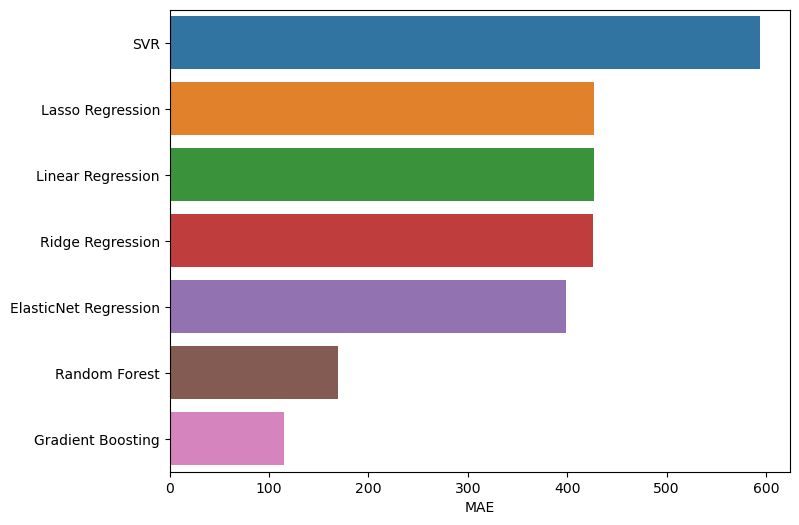

In [10]:
plt.figure(figsize=(8,6))
data = results_df.sort_values(by=['MAE'],ascending=False)
sns.barplot(data=data,x='MAE',y=data.index)

<Axes: xlabel='RMSE'>

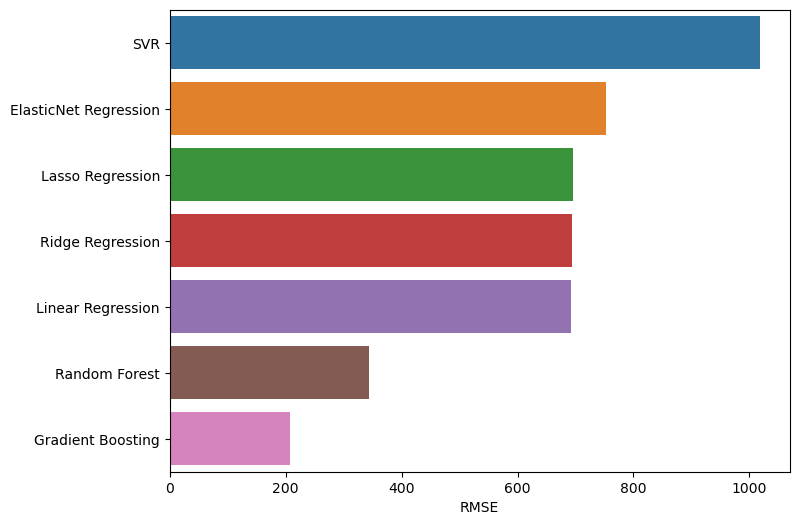

In [11]:
plt.figure(figsize=(8,6))
data = results_df.sort_values(by=['RMSE'],ascending=False)
sns.barplot(data=data,x='RMSE',y=data.index)

<Axes: xlabel='R2'>

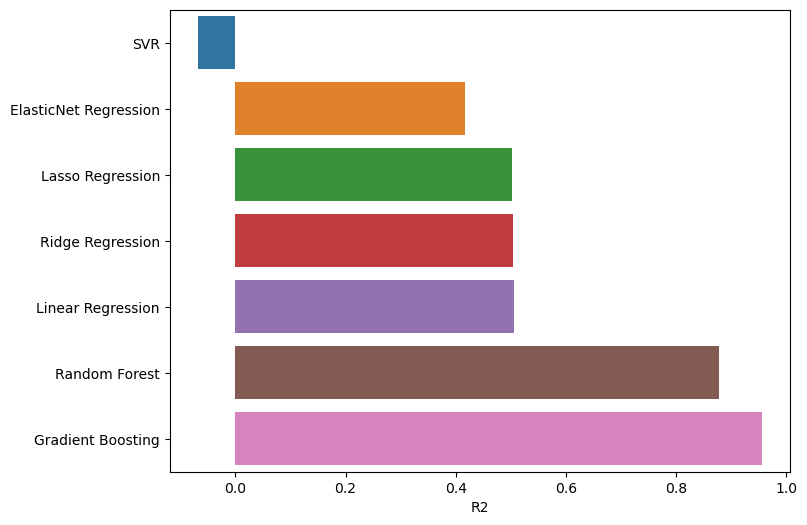

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=results_df.sort_values(by=['R2']),x='R2',y=results_df.sort_values(by=['R2']).index)

## Ridge and Lasso with cross validation

In [13]:
model = RidgeCV(alphas = np.linspace(0.1,10,50))

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print({'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

{'MAE': 411.6553847449528, 'MSE': 494904.60353547306, 'RMSE': 703.4945653915694, 'R2': 0.4904460760167393}


In [14]:
model = LassoCV(alphas = np.linspace(0.1,10,50))

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print({'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

{'MAE': 431.846297511614, 'MSE': 519357.547253637, 'RMSE': 720.664656586985, 'R2': 0.4652693180405142}


## ElasticNet with cross validation

In [15]:
model = ElasticNetCV(l1_ratio=np.linspace(0.1,1,50))

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print({'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
print((model.alpha_,model.l1_ratio_))

{'MAE': 398.68741335177185, 'MSE': 510745.5078568549, 'RMSE': 714.6646121481424, 'R2': 0.4741362763124314}
(0.5511175786599747, 0.7428571428571429)


## GBR with cross validation

In [19]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

gbr = GradientBoostingRegressor()
model = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print({'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})


Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'MAE': 145.1349839145591, 'MSE': 68604.45412458686, 'RMSE': 261.92451989950627, 'R2': 0.9293648340464322}


{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [20]:
model.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [28]:
params = model.best_params_

In [29]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                          min_samples_split=10)

In [30]:
reg.feature_importances_

array([0.12343749, 0.01128389, 0.04126494, 0.02698552, 0.08689453,
       0.16807105, 0.09247908, 0.16165355, 0.05281022, 0.13412624,
       0.00422297, 0.00330701, 0.00150798, 0.01013858, 0.00562029,
       0.07619666])

Text(0.5, 1.0, 'Feature Importance (MDI)')

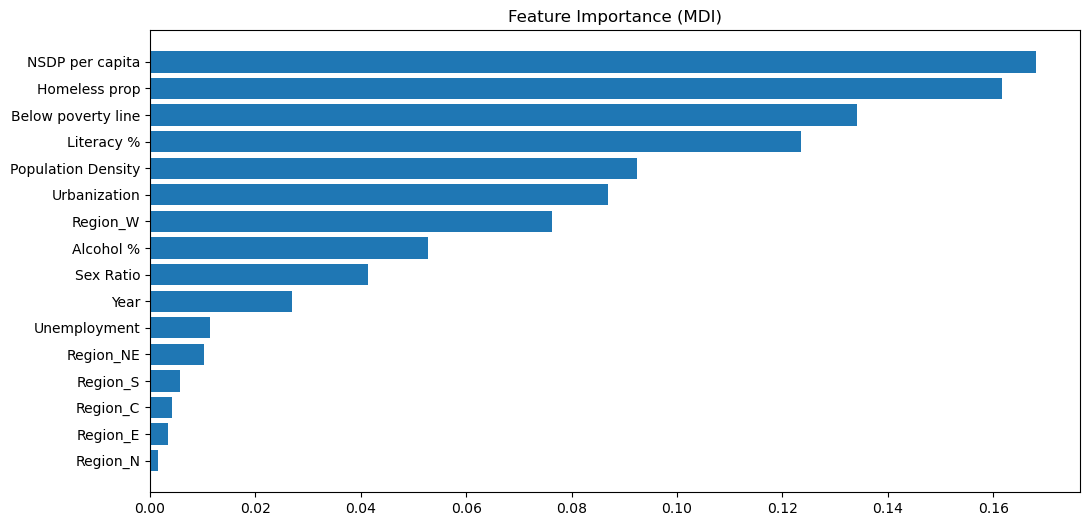

In [31]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title("Feature Importance (MDI)")